Youtube Trend statistics : Regression, ED Analysis.  In this code, we are trying to predict the variable the behavior most influenced for a user. We further do a exploratory data analysis to see how the recent user trend and expressions using nltk,wordcloud, textblob etc.,

The source code and data set is referred from textbook and following websites:
https://www.kaggle.com/datasnaek/youtube-new/kernels
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [78]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
%matplotlib inline

In [12]:
# Importing Data set
df_usa=pd.read_csv("V:/DSP/Datasets/USvideos.csv")
df_ca=pd.read_csv("V:/DSP/Datasets/CAvideos.csv")
df_de=pd.read_csv("V:/DSP/Datasets/DEvideos.csv")
df_fr=pd.read_csv("V:/DSP/Datasets/FRvideos.csv")
df_gb=pd.read_csv("V:/DSP/Datasets/GBvideos.csv")

In [112]:
#View the data columns and top 5 rows using head
df_usa.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df_usa['trending_date'] = pd.to_datetime(df_usa['trending_date'], format='%y.%d.%m')
df_usa['publish_time'] = pd.to_datetime(df_usa['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# separates date and time into two columns from 'publish_time' column

df_usa.insert(4, 'publish_date', df_usa['publish_time'].dt.date)
df_usa['publish_time'] = df_usa['publish_time'].dt.time
df_usa['publish_date']=pd.to_datetime(df_usa['publish_date'])

In [5]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21965 entries, 0 to 21964
Data columns (total 17 columns):
video_id                  21965 non-null object
trending_date             21965 non-null datetime64[ns]
title                     21965 non-null object
channel_title             21965 non-null object
publish_date              21965 non-null datetime64[ns]
category_id               21965 non-null int64
publish_time              21965 non-null object
tags                      21965 non-null object
views                     21965 non-null int64
likes                     21965 non-null int64
dislikes                  21965 non-null int64
comment_count             21965 non-null int64
thumbnail_link            21965 non-null object
comments_disabled         21965 non-null bool
ratings_disabled          21965 non-null bool
video_error_or_removed    21965 non-null bool
description               21546 non-null object
dtypes: bool(3), datetime64[ns](2), int64(5), object(7)
memory usage: 

In [79]:
df_usa["category_id"].value_counts()

24    5073
10    3211
26    2041
25    1866
23    1861
22    1760
28    1341
1     1238
17    1174
27     912
15     558
2      339
20     280
19     247
29      48
43      16
Name: category_id, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A070EB3A58>,
      dtype=object)

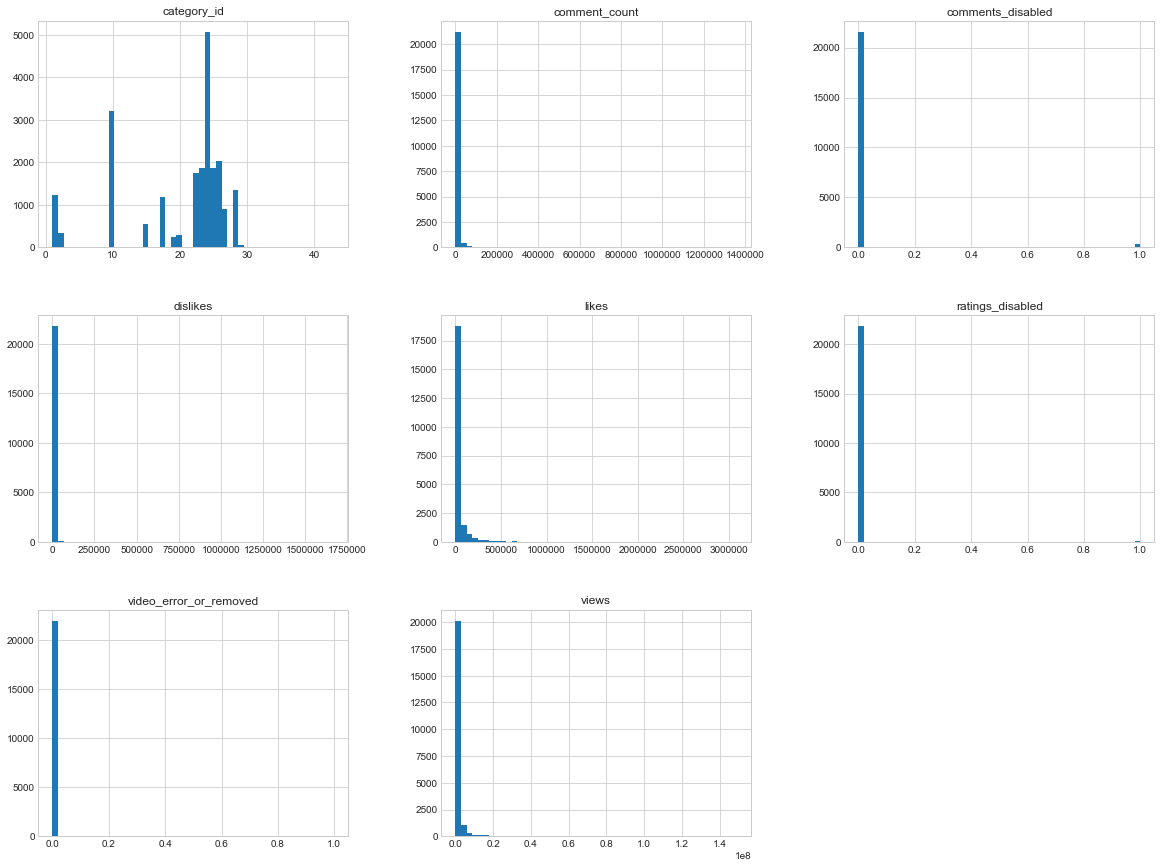

In [80]:
df_usa.hist(bins=50,figsize=(20,15))

In [ ]:
# preparing the dataset for a train and test. Splitting the data using Python package train_test_split_split

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_usa, test_size=0.2, random_state=42)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17572 entries, 12036 to 15795
Data columns (total 16 columns):
video_id                  17572 non-null object
trending_date             17572 non-null object
title                     17572 non-null object
channel_title             17572 non-null object
category_id               17572 non-null int64
publish_time              17572 non-null object
tags                      17572 non-null object
views                     17572 non-null int64
likes                     17572 non-null int64
dislikes                  17572 non-null int64
comment_count             17572 non-null int64
thumbnail_link            17572 non-null object
comments_disabled         17572 non-null bool
ratings_disabled          17572 non-null bool
video_error_or_removed    17572 non-null bool
description               17226 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 1.9+ MB


In [26]:
#Identifying the correlation between the variables
print(df_usa.corr())

                        category_id     views     likes  dislikes  \
category_id                1.000000 -0.113548 -0.123037  0.001510   
views                     -0.113548  1.000000  0.812645  0.527377   
likes                     -0.123037  0.812645  1.000000  0.470482   
dislikes                   0.001510  0.527377  0.470482  1.000000   
comment_count             -0.023170  0.580952  0.719514  0.833455   
comments_disabled          0.044917  0.031804 -0.030562 -0.003228   
ratings_disabled          -0.030137  0.063664 -0.023725 -0.006113   
video_error_or_removed    -0.009364 -0.001952 -0.002952 -0.000831   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                 -0.023170           0.044917         -0.030137   
views                        0.580952           0.031804          0.063664   
likes                        0.719514          -0.030562         -0.023725   
dislikes                     0.833455          -0.003228         -

In [82]:
corr_matrix = df_usa.corr()
corr_matrix["comment_count"].sort_values()

category_id              -0.023170
comments_disabled        -0.022856
ratings_disabled         -0.012286
video_error_or_removed   -0.001919
views                     0.580952
likes                     0.719514
dislikes                  0.833455
comment_count             1.000000
Name: comment_count, dtype: float64

Visual representation to understand the best possible variables influencing others

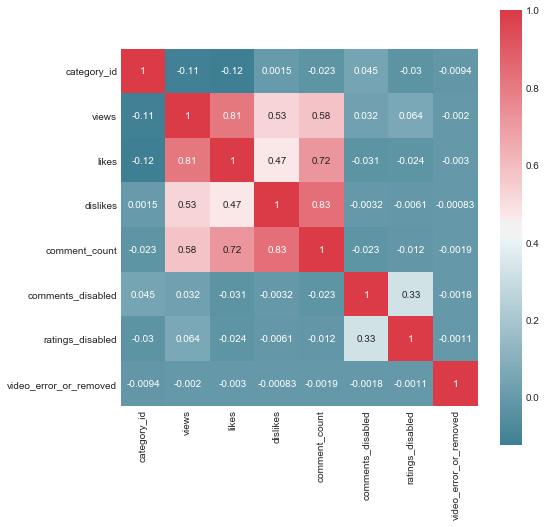

In [28]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_usa.corr(), mask=np.zeros_like(df_usa.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

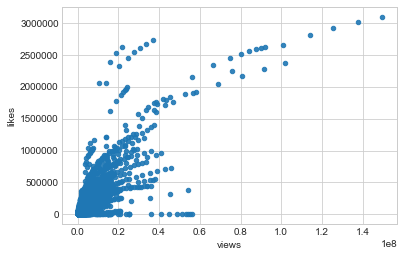

In [29]:
df_usa.plot(kind="scatter",x="views",y="likes", alpha=0.9)

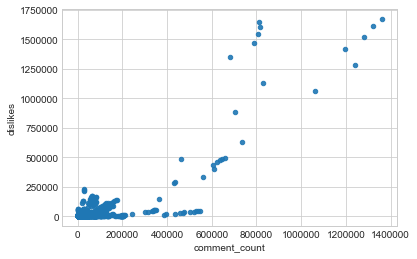

In [34]:
df_usa.plot(kind="scatter",x="comment_count",y="dislikes", alpha=0.9)

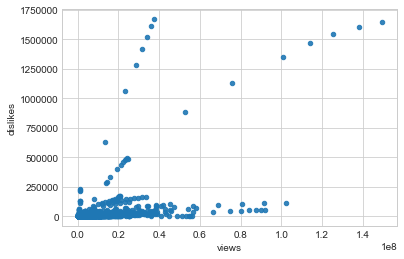

In [31]:
df_usa.plot(kind="scatter",x="views",y="dislikes", alpha=0.9)

The below part of code referred from http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Dislikes and Comment is highly correlated. Running a linear regression with test and train data results in below results.

In [83]:
# from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets

YT_X_train = train['dislikes'].values.reshape(-1,1)
YT_X_test = test['dislikes'].values.reshape(-1,1)

# Split the targets into training/testing sets
YT_y_train = train['comment_count'].values.reshape(-1,1)
YT_y_test = test['comment_count'].values.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(YT_X_train, YT_y_train)

# Make predictions using the testing set
YT_y_pred = regr.predict(YT_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(YT_y_test, YT_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(YT_y_test, YT_y_pred))


Coefficients: 
 [[0.75069303]]
Mean squared error: 448032266.39
Variance score: 0.70


In [84]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets

YT_X_train = train['views'].values.reshape(-1,1)
YT_X_test = test['views'].values.reshape(-1,1)

# Split the targets into training/testing sets
YT_y_train = train['likes'].values.reshape(-1,1)
YT_y_test = test['likes'].values.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(YT_X_train, YT_y_train)

# Make predictions using the testing set
YT_y_pred = regr.predict(YT_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(YT_y_test, YT_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(YT_y_test, YT_y_pred))


Coefficients: 
 [[0.02859753]]
Mean squared error: 8821080636.07
Variance score: 0.64


In [85]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets

YT_X_train = train['views'].values.reshape(-1,1)
YT_X_test = test['views'].values.reshape(-1,1)

# Split the targets into training/testing sets
YT_y_train = train['dislikes'].values.reshape(-1,1)
YT_y_test = test['dislikes'].values.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(YT_X_train, YT_y_train)

# Make predictions using the testing set
YT_y_pred = regr.predict(YT_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(YT_y_test, YT_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(YT_y_test, YT_y_pred))


Coefficients: 
 [[0.00458287]]
Mean squared error: 1237858531.22
Variance score: 0.27


In [113]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets

YT_X_train = train['comment_count'].values.reshape(-1,1)
YT_X_test = test['comment_count'].values.reshape(-1,1)

# Split the targets into training/testing sets
YT_y_train = train['dislikes'].values.reshape(-1,1)
YT_y_test = test['dislikes'].values.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(YT_X_train, YT_y_train)

# Make predictions using the testing set
YT_y_pred = regr.predict(YT_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(YT_y_test, YT_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(YT_y_test, YT_y_pred))


Coefficients: 
 [[0.92428728]]
Mean squared error: 511797710.30
Variance score: 0.70


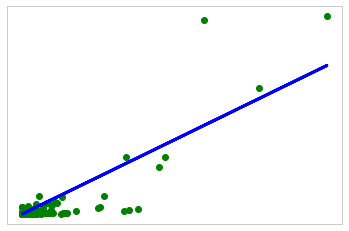

In [114]:
# Plot outputs
plt.scatter(YT_X_test, YT_y_test,  color='green')
plt.plot(YT_X_test, YT_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Since Linear Regression hasn't performed well. We would try with Decision Tree Regression

In [91]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(YT_X_train, YT_y_train)

YT_prediction_DT = tree_reg.predict(YT_X_train)
tree_mse = mean_squared_error(YT_y_train, YT_prediction_DT)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

26624.31598636275

Continuing with Cross Validation to validate the decision tree  and Linear results. I could see that results useful in this case as it has minimum rmse scores. This refers that comment_count does help us to predict the dislikes on a video. 

In [96]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, YT_X_train, YT_y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [97]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [130918.65285016 132137.56318076 145515.87703132 143031.3949067
 112811.57646395 141156.54278296 146777.8485319  144150.043914
 144812.09664467 124340.15708146]
Mean: 136565.1753387878
Standard deviation: 10667.801291314787


In [99]:
lin_scores = cross_val_score(regr,  YT_X_train, YT_y_train,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [127593.83592519 138170.88246561 118932.00258602 117411.95010342
 123741.56117891 123841.18274374 118145.81052438 141959.24197551
 142179.66035926 121941.4567384 ]
Mean: 127391.75846004346
Standard deviation: 9270.447037015985


In [111]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
y = YT_y_train.ravel()
YT_y_train = np.array(y).astype(int)
forest_rmse_scores = forest_reg.fit(YT_X_train, YT_y_train)
display(forest_rmse_scores)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [87]:
usa_video_views=df_usa.groupby(['video_id'])['views'].agg('sum')
usa_video_likes=df_usa.groupby(['video_id'])['likes'].agg('sum')
usa_video_dislikes=df_usa.groupby(['video_id'])['dislikes'].agg('sum')
usa_video_comment_count=df_usa.groupby(['video_id'])['comment_count'].agg('sum')

EDA starts here : Defining the WordCloud size and importing required packages

In [88]:
# from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cleaning the data to make single words to facilitate categorization to classify the most common words(title) and most frequent words(tags)

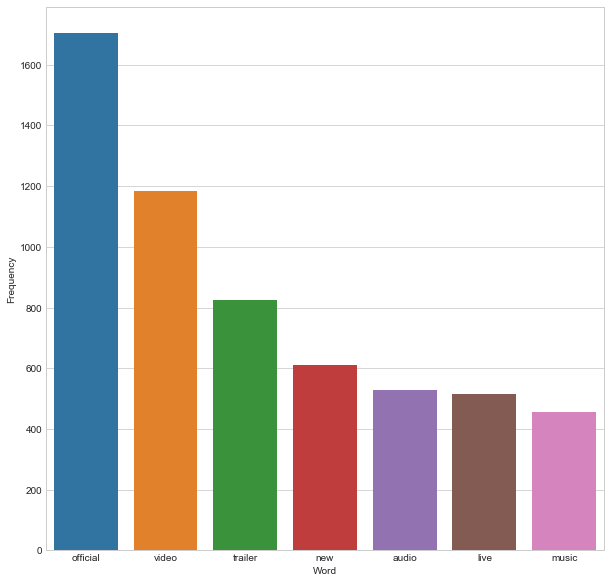

In [89]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import seaborn as sns

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df_usa['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

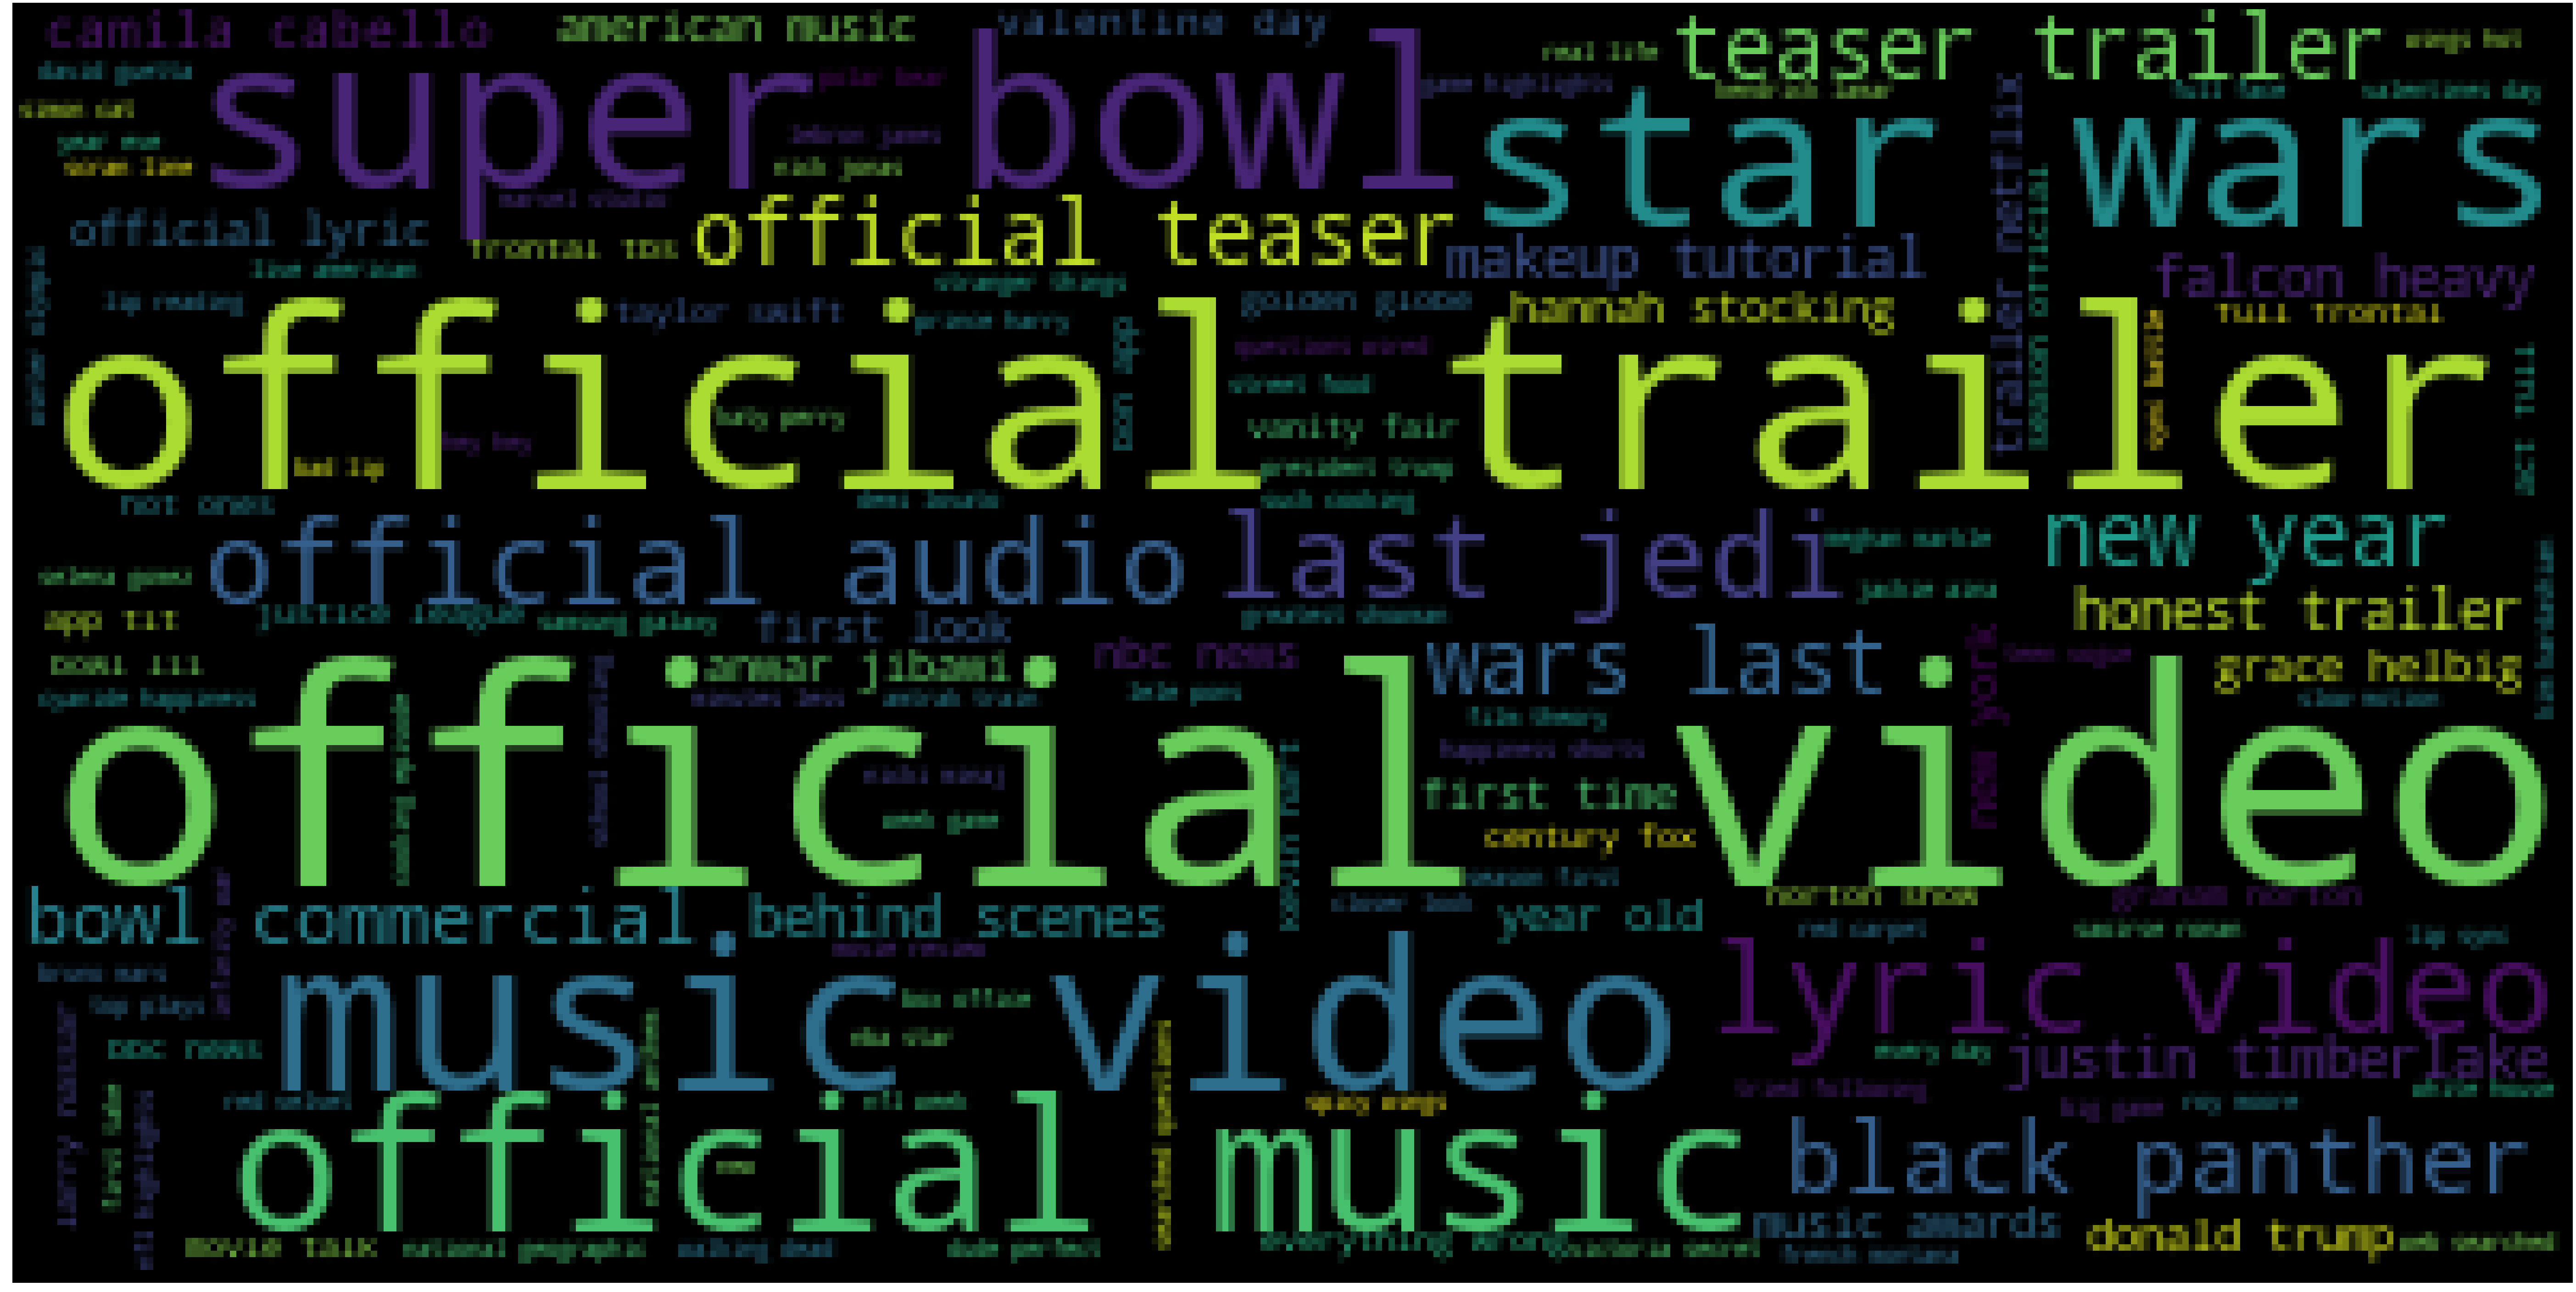

In [15]:
    wc(cleaned_data_title,'black','Common Words' )

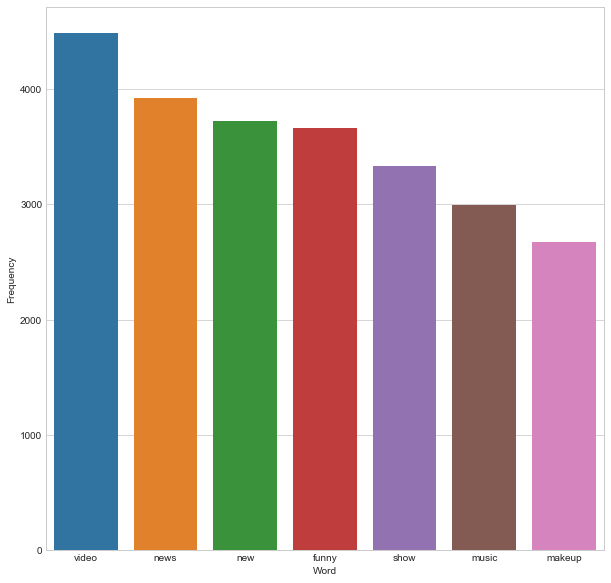

In [16]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

tags_lower = df_usa['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

# Remove characters which have length less than 2  
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

# Remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]        

# Calculate frequency distribution
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(7))

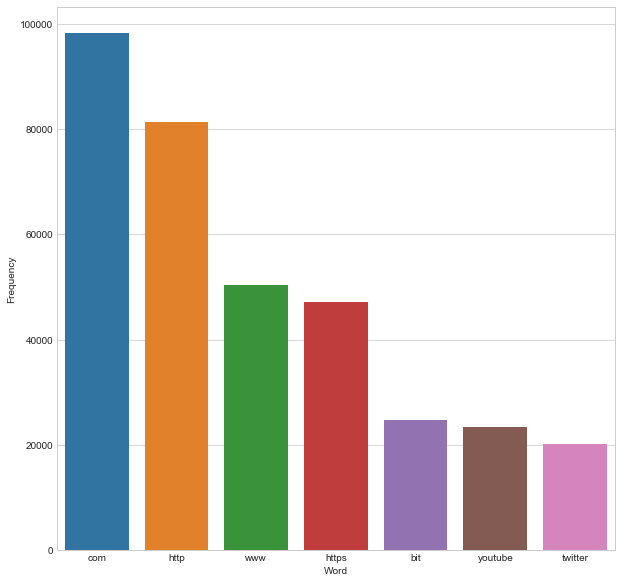

In [18]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

desc_lower = df_usa['description'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

#print(rslt_desc)
#plt.style.use('ggplot')
#rslt.plot.bar(rot=0)


plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))

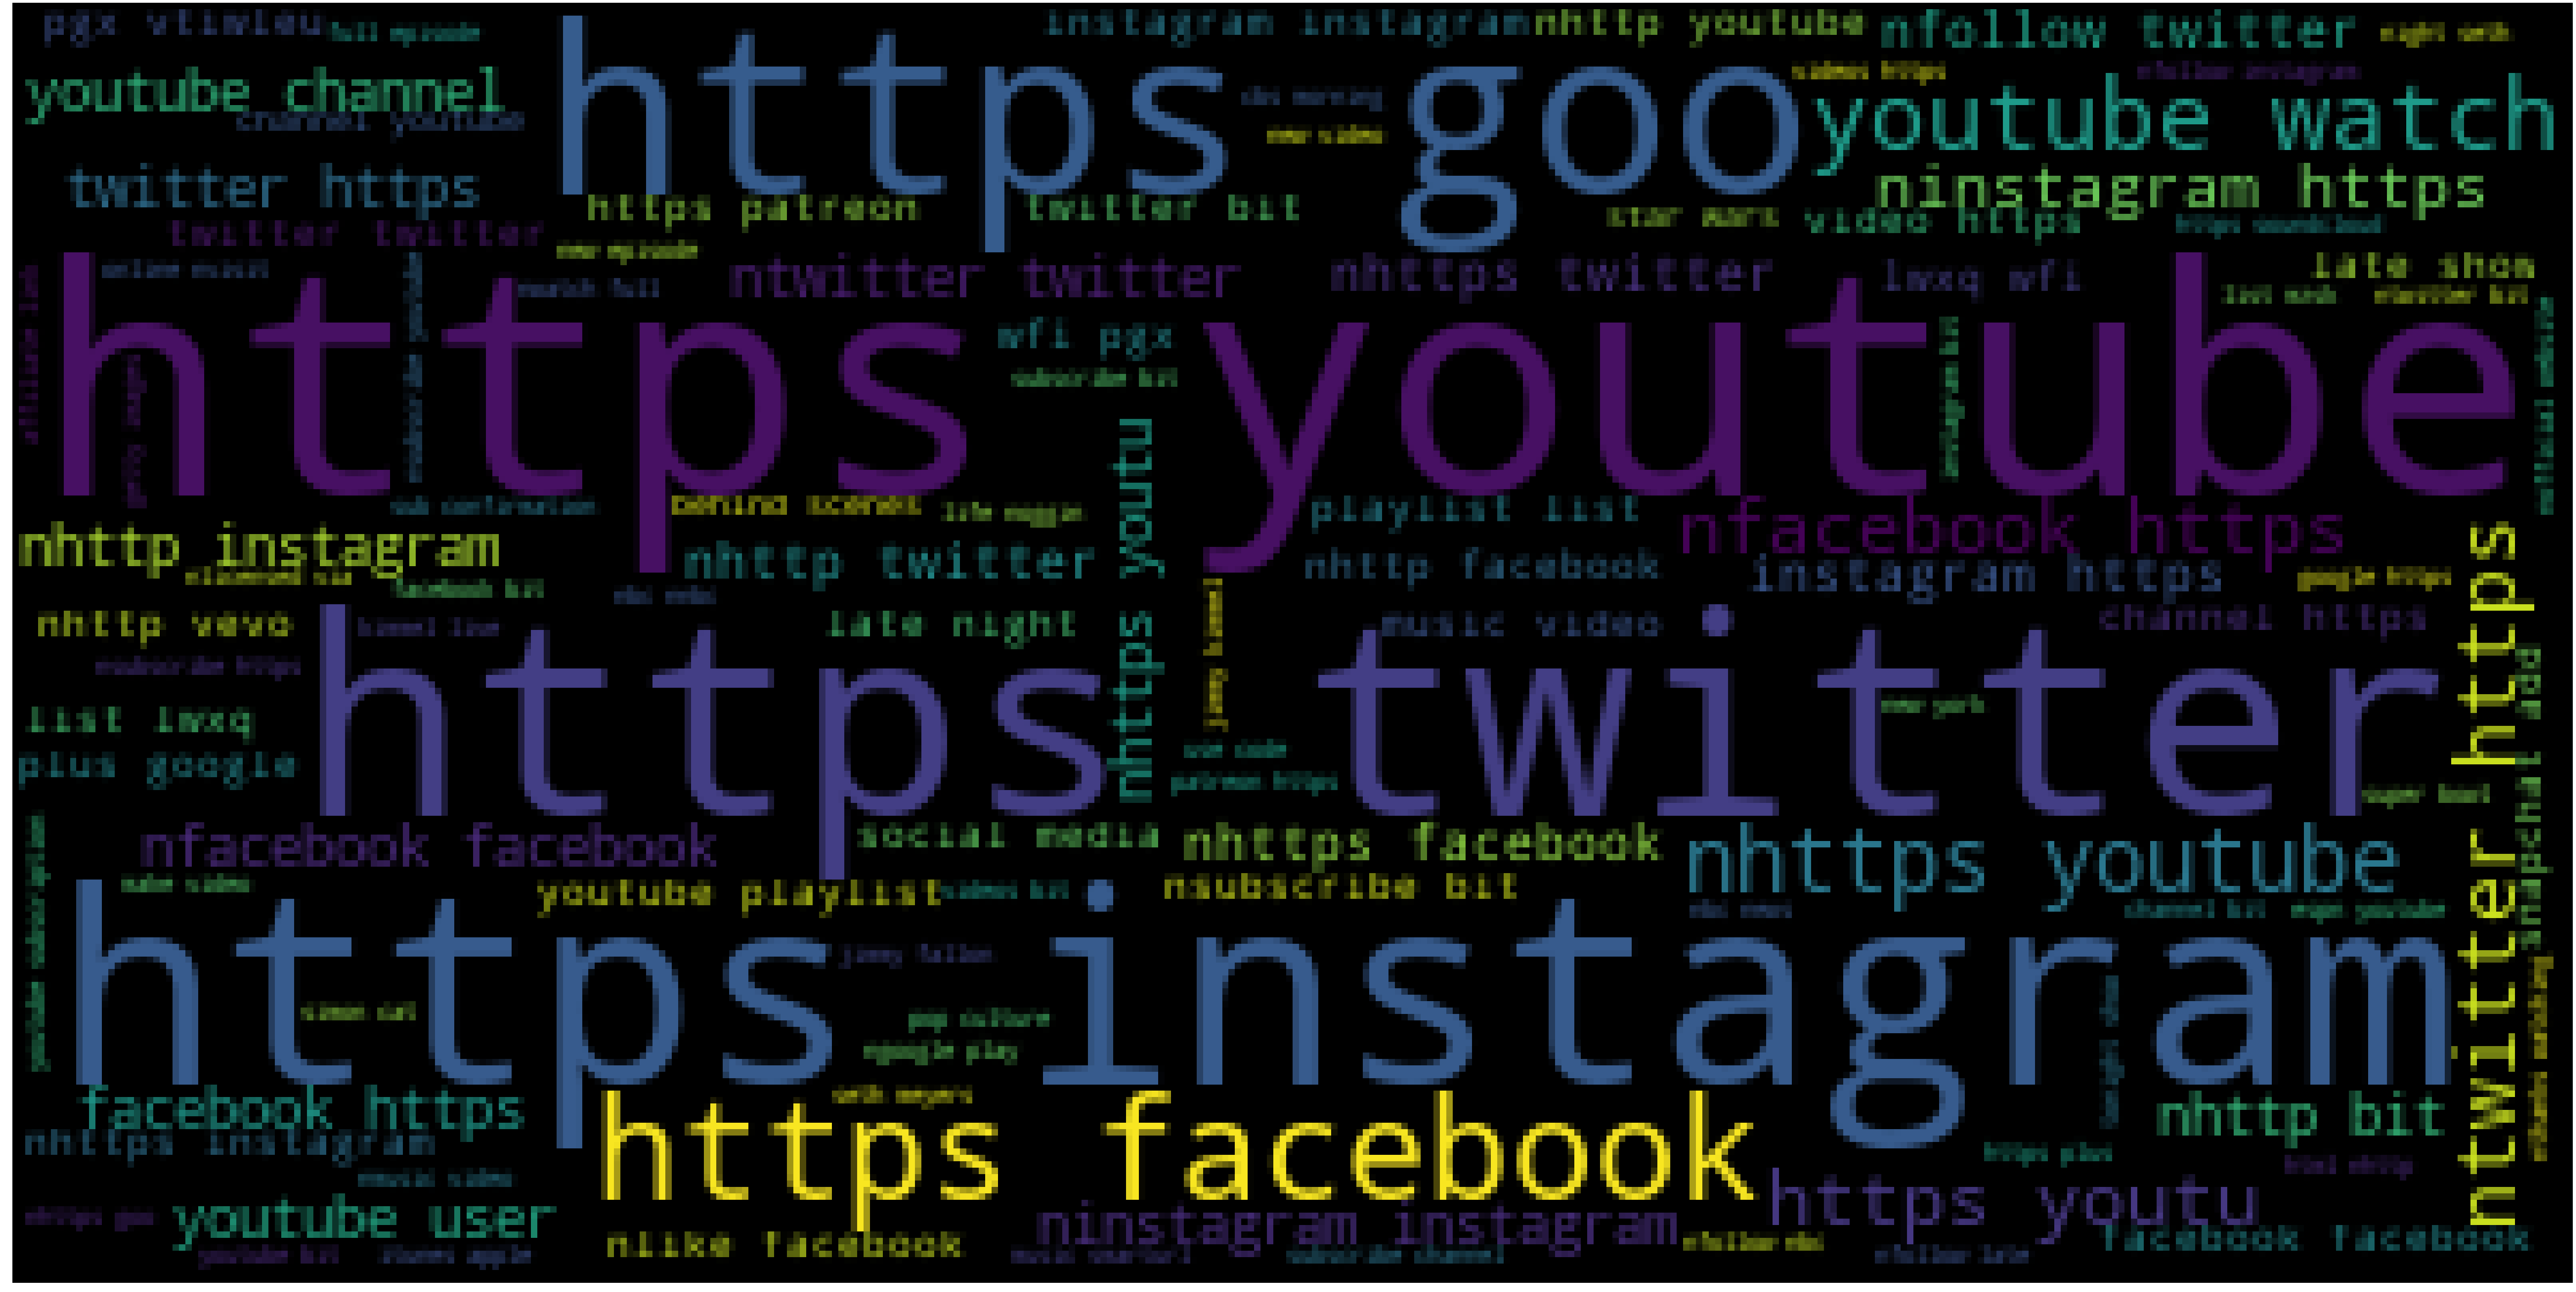

In [90]:
wc(cleaned_data_desc,'black','Frequent Words' )

Emotional Analysis based on textblob polarity to identify positive, negative and neutral words and categorise them for tags and description

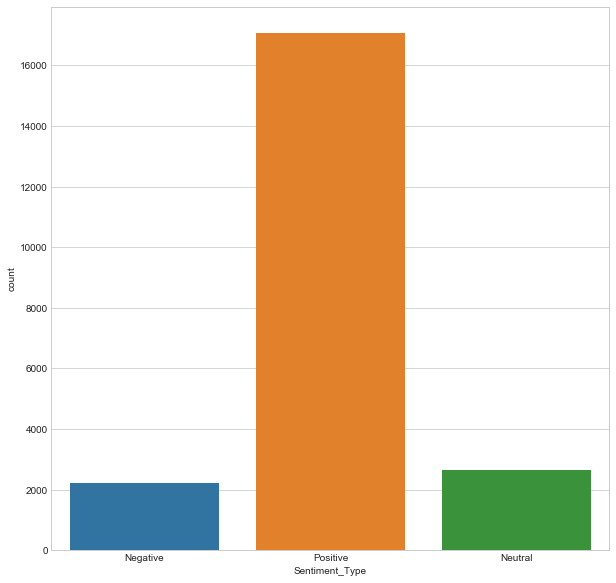

In [21]:
from textblob import TextBlob

bloblist_desc = list()

df_usa_descr_str=df_usa['description'].astype(str)
for row in df_usa_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)

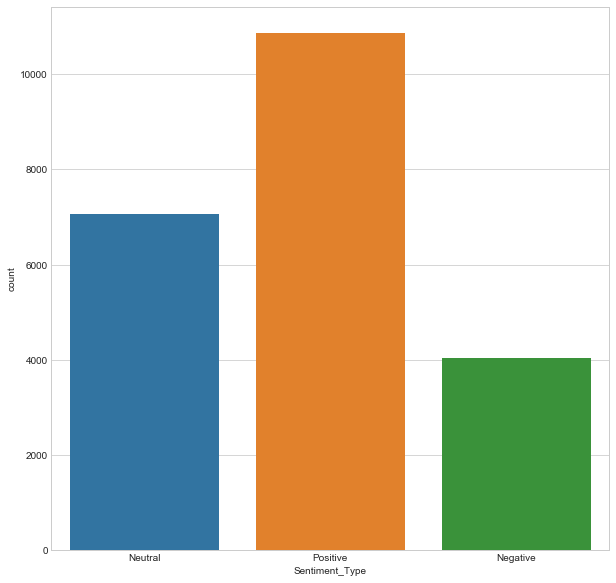

In [22]:
from textblob import TextBlob

bloblist_tags = list()

df_usa_tags_str=df_usa['tags']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)